In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils.sulfur.constant as const

from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer
from utils.monte_carlo_resampling_operator import MonteCarloResamplingOperator

In [2]:
%%time

animal_name = const.ANIMAL_NAMES[0]
context_name = 'A1postES'

calculator = TimeCorrelationCalculator(animal_name, context_name)
result = calculator.calc(start=90, end=130)
result[0]
#TimeCorrelationViewer(*result).draw(title='A1postES 0-40s in %s' % animal_name)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


CPU times: user 2min 18s, sys: 427 ms, total: 2min 18s
Wall time: 2min 18s


In [3]:
shuffle_calculator = result[0]
df = shuffle_calculator.shuffle_dfs
df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.406788,-0.002105,0.000229,-0.004225,-0.010294,-0.011418,0.001629,0.017355,-0.012841,0.086842,...,0.028122,-0.004406,0.005635,0.029612,0.019854,0.013079,0.020988,-0.006731,-0.009208,0.389435
1,0.579606,-0.004354,-0.009358,0.016018,-0.004087,0.040975,-0.003101,0.017623,0.053224,0.049327,...,0.000776,0.000064,0.047037,-0.007851,0.007166,-0.01008,-0.01659,0.033639,-0.013652,0.442272
2,0.56677,-0.002699,-0.006789,-0.012601,0.007094,-0.000105,-0.00992,0.030781,-0.012729,0.059559,...,0.003214,0.057739,0.026868,0.012711,0.002036,-0.008272,0.007342,0.021518,0.009565,0.379987
3,0.428565,0.01184,-0.008075,0.018777,0.001118,0.002446,0.001681,0.004483,0.024944,0.02331,...,0.001484,-0.016746,-0.013317,0.007203,-0.002326,-0.002775,0.015391,-0.013092,-0.002956,0.455693
4,0.335701,0.054492,-0.009502,0.002762,0.019815,0.017633,0.008414,0.02093,0.032519,0.108104,...,-0.009979,0.060887,-0.003085,0.054445,-0.007228,0.014787,0.036769,0.025212,0.009936,0.398999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.408322,0.049717,0.008444,0.014075,0.003562,0.003788,-0.014605,-0.015279,-0.011179,0.022817,...,0.051615,0.02498,0.012627,0.057454,0.076127,0.006912,0.005148,0.100112,0.030355,0.442545
996,0.444238,-0.014563,-0.005371,0.004736,-0.002552,-0.011123,0.007627,0.001377,-0.007635,-0.012943,...,0.029426,0.027107,0.003834,0.04833,0.007758,0.010494,-0.005985,0.02588,0.042468,0.320205
997,0.533484,-0.015395,0.001948,-0.013839,0.025016,0.008637,0.011957,0.013933,0.014718,0.001002,...,0.027881,0.04263,-0.013077,0.021334,-0.012512,0.025222,0.023358,0.013155,0.0032,0.391907
998,0.449685,-0.003892,-0.009408,-0.005351,0.005939,-0.000724,-0.006792,-0.005511,-0.008992,0.0161,...,0.012891,0.10212,-0.009618,0.025794,0.016837,-0.005716,0.008222,-0.000221,0.050711,0.37492


In [4]:
mc = MonteCarloResamplingOperator()
mc.model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_404a3878afe87d0b776df5172a45ee1a NOW.


In [5]:
%%time

items = df.iloc[:, 1]
fit = mc.resampling(items)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


CPU times: user 23 ms, sys: 132 ms, total: 155 ms
Wall time: 563 ms


(array([202., 327., 161.,  96.,  84.,  49.,  28.,  19.,  15.,   8.,   4.,
          1.,   2.,   3.,   1.]),
 array([1.000000013351432e-10, 0.012896624698501273, 0.025793249297002545,
        0.03868987389550382, 0.05158649849400509, 0.06448312309250637,
        0.07737974769100764, 0.09027637228950891, 0.10317299688801018,
        0.11606962148651145, 0.12896624608501273, 0.141862870683514,
        0.15475949528201527, 0.16765611988051654, 0.1805527444790178,
        0.19344936907751908], dtype=object),
 <BarContainer object of 15 artists>)

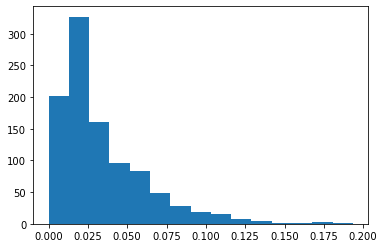

In [6]:
plt.hist(items, bins=15)

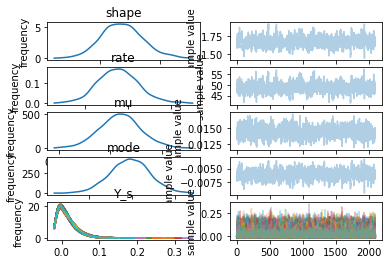

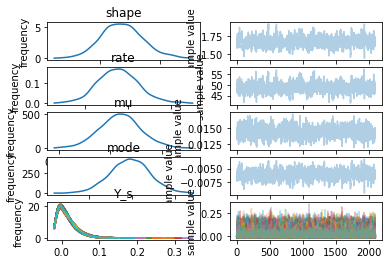

In [7]:
fit.plot()

In [8]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_404a3878afe87d0b776df5172a45ee1a.
3 chains, each with iter=1000; warmup=300; thin=1; 
post-warmup draws per chain=700, total post-warmup draws=2100.

           mean se_mean     sd    2.5%     25%     50%     75%   97.5%  n_eff   Rhat
shape      1.67  3.5e-3   0.07    1.54    1.63    1.67    1.72    1.82    415    1.0
rate       48.9    0.12    2.4   44.17   47.28   48.88   50.43   53.97    390   1.01
mu         0.01  2.0e-5 8.1e-4    0.01    0.01    0.01    0.01    0.02   1621    1.0
mode    -6.1e-3  3.8e-5 9.1e-4 -7.9e-3 -6.7e-3 -6.1e-3 -5.5e-3 -4.3e-3    589    1.0
Y_s[1]     0.01  5.7e-4   0.03   -0.02 -5.2e-3  8.2e-3    0.03    0.08   2141    1.0
Y_s[2]     0.02  5.7e-4   0.03   -0.02 -4.9e-3  8.4e-3    0.03    0.09   2291    1.0
Y_s[3]     0.01  6.0e-4   0.03   -0.02 -4.9e-3  7.6e-3    0.03    0.08   1892    1.0
Y_s[4]     0.01  5.6e-4   0.03   -0.02 -5.2e-3  7.9e-3    0.03    0.08   2186    1.0
Y_s[5]  

In [9]:
ddf = pd.DataFrame(fit.extract('Y_s')['Y_s'])
ddf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.099519,0.022753,0.011038,-0.014944,0.024367,-0.008926,0.029964,0.018948,0.024403,-0.005597,...,0.021796,0.003718,-0.002166,0.043742,-0.017804,0.032503,-0.016638,0.026566,0.012331,-0.000837
1,0.003408,0.004089,0.049176,-0.001979,0.026533,0.004755,-0.001040,0.018310,-0.008188,0.000003,...,0.012058,0.055024,0.002043,0.049149,-0.015206,-0.007919,0.061129,-0.000985,-0.007813,0.021098
2,-0.019157,0.024688,-0.001859,0.024212,0.009966,-0.002144,0.047068,0.001893,0.005337,0.068553,...,0.002349,-0.006366,-0.012115,0.027090,0.053176,-0.012539,0.006531,0.086161,-0.005243,0.041770
3,0.041995,-0.003441,0.039252,0.004787,0.023618,0.006822,0.083728,0.051622,-0.005516,0.025409,...,-0.010266,0.018420,0.013502,0.002448,0.074330,0.006134,0.030292,-0.013105,0.002678,0.005437
4,0.017566,0.053137,0.029692,-0.008007,0.008889,0.013276,-0.004332,0.035541,-0.010363,0.058400,...,0.036390,-0.012884,0.017049,0.030819,0.018342,-0.000289,-0.004306,0.004046,-0.013752,-0.001206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,-0.004539,-0.002211,0.046890,-0.005533,0.001472,-0.015015,0.073621,-0.006631,0.031768,0.066011,...,-0.019742,0.000761,0.030092,0.037022,0.006163,-0.018110,-0.007422,0.000249,0.016298,0.029519
2096,-0.015972,0.000325,0.008363,-0.008325,0.005845,-0.004549,0.001950,-0.013060,0.012400,-0.000623,...,0.016513,0.037924,0.048115,-0.006792,0.006593,0.091396,0.036441,0.010281,0.007495,0.006555
2097,-0.015521,0.046911,-0.008174,-0.016500,-0.004077,0.005915,-0.014791,0.025181,-0.017640,0.015454,...,0.044099,0.005051,0.018485,0.000873,-0.004911,0.080059,0.023037,0.027576,-0.009352,-0.015196
2098,0.035193,-0.002942,0.005414,0.020439,0.018726,-0.012105,0.048434,-0.003894,0.019847,0.011449,...,-0.008038,-0.003434,0.028913,0.000972,-0.012548,-0.013010,-0.016969,0.003937,0.024539,-0.017517


In [14]:
mode = np.mean(fit.extract('mode')['mode'])
mode

-0.006109783777526331

In [11]:
result[1]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.388989,0.036405,-0.006136,-0.005001,0.021087,-0.001956,-0.000979,0.020496,0.007864,0.012419,...,-0.01352,0.006987,0.008965,0.026201,-0.009104,-0.017803,-0.006084,-0.016866,-0.008792,-0.00446
1,0.036405,0.456106,-0.007674,-0.000435,-0.00595,0.009615,0.037333,0.013959,-0.008959,0.001232,...,-0.006474,-0.00795,-0.014747,-0.005806,-0.011344,-0.016426,0.006326,-0.017691,0.004711,0.016426
2,-0.006136,-0.007674,0.32916,-0.005633,0.000593,0.006555,-0.009793,-0.005318,-0.013406,-0.005667,...,0.049704,0.006587,-0.008749,0.039543,0.013346,-0.005763,0.005368,0.055891,-0.00362,-0.013696
3,-0.005001,-0.000435,-0.005633,0.228293,-0.011918,-0.003498,0.008012,-0.011906,-0.011169,-0.001989,...,-0.014404,-0.011722,0.00099,-0.008433,0.005843,-0.006711,-0.003482,0.023854,-0.005492,0.036426
4,0.021087,-0.00595,0.000593,-0.011918,0.361437,-0.006917,0.020925,-0.006792,-0.003823,0.002198,...,0.000792,-0.009594,-0.010663,-0.012105,0.009119,-0.018604,0.018805,-0.011884,0.020882,-0.000836
5,-0.001956,0.009615,0.006555,-0.003498,-0.006917,0.215059,-0.003046,-0.009029,-0.007219,-0.007059,...,-0.010727,-0.004436,0.001387,0.021054,0.027115,0.017126,0.002887,-0.013547,-0.001365,-0.010619
6,-0.000979,0.037333,-0.009793,0.008012,0.020925,-0.003046,0.261483,0.013475,0.009553,-0.00787,...,-0.006,0.001891,-0.014624,0.034804,0.009134,-0.009511,0.018252,-0.008236,0.005046,0.013687
7,0.020496,0.013959,-0.005318,-0.011906,-0.006792,-0.009029,0.013475,0.269914,-0.001216,-0.006935,...,0.008134,0.002108,0.007869,0.063274,-0.007434,-0.009931,-0.00511,0.006981,-0.000082,0.000195
8,0.007864,-0.008959,-0.013406,-0.011169,-0.003823,-0.007219,0.009553,-0.001216,0.351965,0.021141,...,0.012154,0.005552,0.005016,-0.012865,-0.011517,-0.002505,-0.006146,-0.000709,0.009962,-0.003427
9,0.012419,0.001232,-0.005667,-0.001989,0.002198,-0.007059,-0.00787,-0.006935,0.021141,0.455651,...,0.005413,0.029706,0.008772,0.018549,-0.006,-0.005689,-0.007016,0.004573,-0.013367,-0.001035


In [12]:
result[2]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.459531,0.011822,0.000237,0.004032,0.005406,0.000624,0.001142,0.005518,0.012499,0.016335,...,0.017794,0.020973,0.012435,0.006781,0.007457,0.006145,0.005446,0.012049,0.010169,0.003729
1,0.011822,0.422289,0.001752,-0.000902,0.002925,0.005772,0.005115,0.003843,0.001429,0.018185,...,0.01435,0.006394,0.023399,0.002048,0.006485,0.005189,0.005828,0.009492,0.017653,0.004292
2,0.000237,0.001752,0.30113,0.002772,0.007782,0.002176,-0.000413,0.005048,0.000289,0.000569,...,0.001673,-0.00005,0.001662,0.000547,-0.000917,-0.001201,0.002221,0.002829,-0.001197,0.001436
3,0.004032,-0.000902,0.002772,0.294925,0.003385,0.004932,0.005183,0.003692,0.003421,0.008549,...,0.005078,0.008478,0.001402,0.002251,0.003336,0.00194,0.001102,0.0049,0.001469,0.003805
4,0.005406,0.002925,0.007782,0.003385,0.329438,0.012222,0.004957,0.004197,-0.000011,0.00215,...,-0.000284,0.00255,0.004624,-0.000198,0.00097,0.00078,0.009202,0.000277,0.007728,-0.000049
5,0.000624,0.005772,0.002176,0.004932,0.012222,0.279232,0.004093,0.008366,0.001708,0.005009,...,0.00489,0.002376,0.004928,0.000108,-0.00003,0.003781,0.001354,0.005356,0.0044,-0.000214
6,0.001142,0.005115,-0.000413,0.005183,0.004957,0.004093,0.332999,0.015215,-0.000682,0.011432,...,0.000972,0.008316,0.004718,0.001984,0.007256,0.0011,0.001814,0.004163,0.009649,-0.000439
7,0.005518,0.003843,0.005048,0.003692,0.004197,0.008366,0.015215,0.297835,0.005966,0.026095,...,0.015194,0.017039,0.007307,0.004799,0.003018,0.009627,0.005622,0.019505,0.013026,0.003013
8,0.012499,0.001429,0.000289,0.003421,-0.000011,0.001708,-0.000682,0.005966,0.413062,0.014466,...,0.017593,0.012948,0.010223,0.000346,0.009879,0.004795,0.004635,0.006133,0.007262,0.005388
9,0.016335,0.018185,0.000569,0.008549,0.00215,0.005009,0.011432,0.026095,0.014466,0.407269,...,0.037779,0.027549,0.025803,0.004334,0.010328,0.028327,0.006501,0.023071,0.01743,0.007347


In [ ]:
resampling = mc.resamplings(df)
resampling

In [ ]:
TimeCorrelationViewer(*result[1], result[2]).draw(title='A1postES 0-40s in %s' % animal_name)